<a href="https://colab.research.google.com/github/sdemirus/ultimate_data_science_challenge/blob/main/ultimate_data_science_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 Exploratory data analysis

### Load required libraries

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import calendar
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

### Load the login data from a JSON file and EDA

In [161]:
file_path = '/content/logins.json'
login_data = pd.read_json(file_path)
login_data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [162]:
login_data.shape

(93142, 1)

In [163]:
login_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [164]:
login_data.isnull().sum()

,0
login_time,0


In [165]:
# Convert the login_time column to datetime format
#login_data['login_time'] = pd.to_datetime(login_data['login_time'])

# Set login_time as the index
login_data.set_index('login_time', inplace=True)
login_data['count'] = 1

# Resample the data in 15-minute intervals and count the number of logins
login_counts_data = login_data.resample('15T', label = 'right').sum()
login_counts_data.head()

,count
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9
1970-01-01 21:00:00,7
1970-01-01 21:15:00,1


In [166]:
login_counts_data.tail()

,count
login_time,
1970-04-13 18:00:00,5
1970-04-13 18:15:00,5
1970-04-13 18:30:00,2
1970-04-13 18:45:00,7
1970-04-13 19:00:00,6


In [167]:
login_counts_data.shape

(9788, 1)

In [168]:
login_counts_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [169]:
login_counts_data.isnull().sum()

,0
count,0


In [170]:
# Exstract features from the dataset
login_counts_data['time'] = pd.to_datetime(login_counts_data.index)

In [171]:
login_counts_data['month'] = login_counts_data.time.dt.month
login_counts_data['day'] = login_counts_data.time.dt.day
login_counts_data['hour'] = login_counts_data.time.dt.hour
login_counts_data['week'] = login_counts_data.index.isocalendar().week
login_counts_data['weekday'] = login_counts_data.time.dt.weekday

In [172]:
login_counts_data.head()

,count,time,month,day,hour,week,weekday
login_time,,,,,,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00,1,1,20,1,3
1970-01-01 20:30:00,6,1970-01-01 20:30:00,1,1,20,1,3
1970-01-01 20:45:00,9,1970-01-01 20:45:00,1,1,20,1,3
1970-01-01 21:00:00,7,1970-01-01 21:00:00,1,1,21,1,3
1970-01-01 21:15:00,1,1970-01-01 21:15:00,1,1,21,1,3


### Login activities

In [173]:
#month
print ('[Grouping by month]')
print (login_counts_data.groupby('month')['count'].aggregate(np.sum))

[Grouping by month]
month
1    21225
2    24669
3    33727
4    13521
Name: count, dtype: int64


<ipython-input-173-92e690983455>:3: FutureWarning: The provided callable <function sum at 0x795a1e916dd0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print (login_counts_data.groupby('month')['count'].aggregate(np.sum))


(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

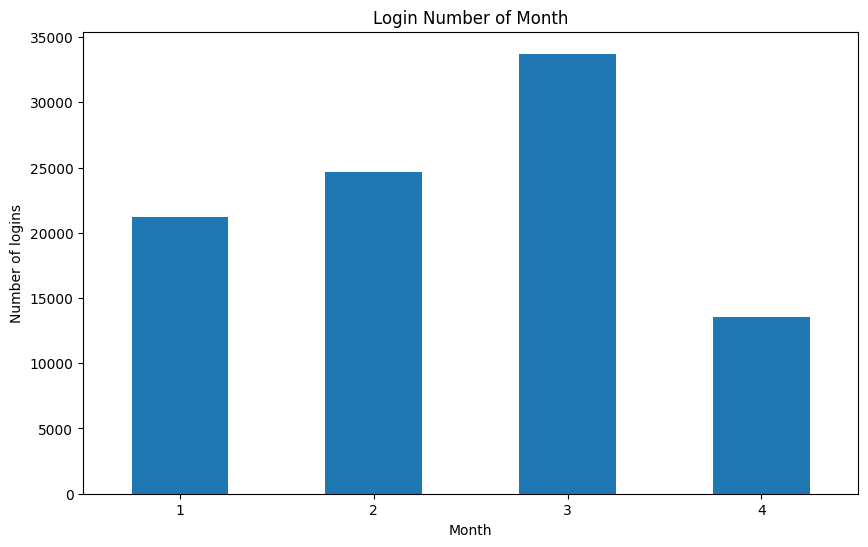

In [174]:
login_counts_data.groupby('month')['count'].sum().plot(kind='bar')
plt.title("Login Number of Month")
plt.xlabel("Month")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Login number kept increasing from January to March. The login number of March is highest. Because there are only 13 days data in April, so it is not enough to compare with other months.

In [175]:
#week
print ('[Grouping by week]')
print (login_counts_data.groupby('week')['count'].aggregate(np.sum))

[Grouping by week]
week
1     2368
2     5218
3     5021
4     4750
5     4747
6     5564
7     5914
8     7038
9     6554
10    7400
11    7329
12    8959
13    7284
14    8096
15    6496
16     404
Name: count, dtype: int64


<ipython-input-175-90de790ff2f5>:3: FutureWarning: The provided callable <function sum at 0x795a1e916dd0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print (login_counts_data.groupby('week')['count'].aggregate(np.sum))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16')])

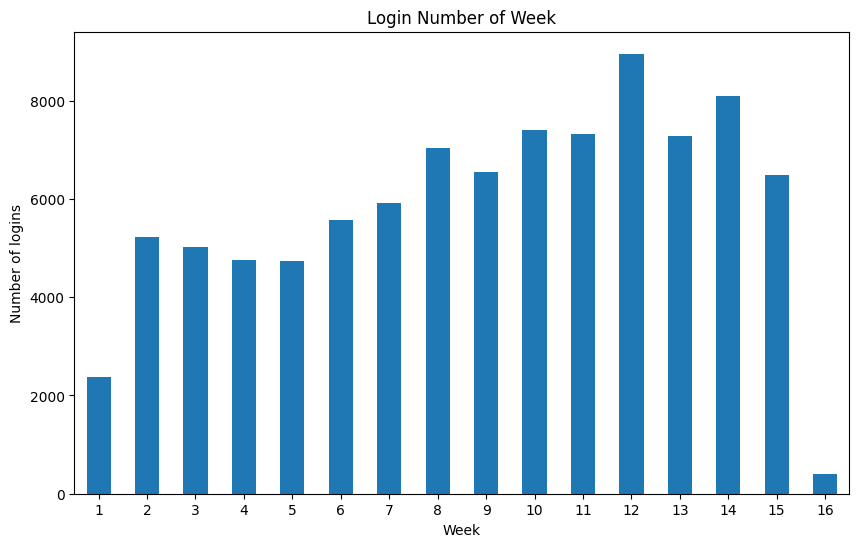

In [176]:
login_counts_data.groupby('week')['count'].sum().plot(kind='bar')
plt.title("Login Number of Week")
plt.xlabel("Week")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Logins in week 12 are the most. It is the last week of March. Logins in week 14 are the second most. It is the second week of April.

In [177]:
#weekday
print ('[Grouping by weekday]')
print (login_counts_data.groupby('weekday')['count'].aggregate(np.sum)/16)

[Grouping by weekday]
weekday
0     553.0625
1     576.6250
2     642.6250
3     746.9375
4     947.0000
5    1214.6250
6    1140.5000
Name: count, dtype: float64


<ipython-input-177-b03d57b1b81c>:3: FutureWarning: The provided callable <function sum at 0x795a1e916dd0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print (login_counts_data.groupby('weekday')['count'].aggregate(np.sum)/16)


[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

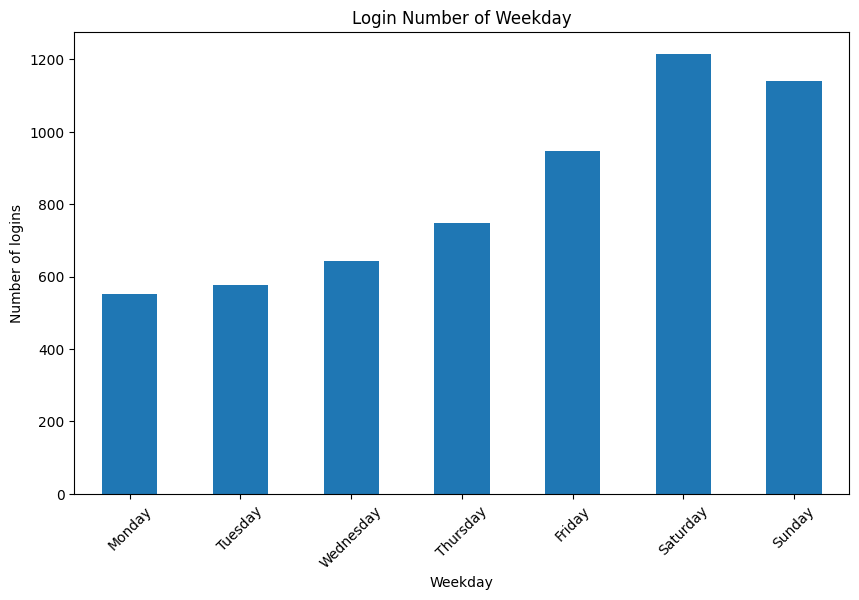

In [178]:
ax = (login_counts_data.groupby('weekday')['count'].sum()/16).plot(kind='bar')
plt.title("Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

Login number kept increasing from Monday to Saturday. There are more logins in weekends than in weekdays. Logins on Saturday are the most, and logins on Sunday are the second most, while logins on Friday are the third most.

In [179]:
# Aggregate login counts based on 1-day time intervals
login_data_day = login_data.resample('D').sum()
login_data_day.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


In [180]:
login_data_day['date'] = login_data_day.index.date
login_data_day['weekday'] = login_data_day.index.dayofweek
login_data_day.head()

,count,date,weekday
login_time,,,
1970-01-01,112,1970-01-01,3
1970-01-02,681,1970-01-02,4
1970-01-03,793,1970-01-03,5
1970-01-04,788,1970-01-04,6
1970-01-05,459,1970-01-05,0


<ipython-input-181-9b5ea3c5ddd5>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([calendar.day_name[d] for d in range(7)])


[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

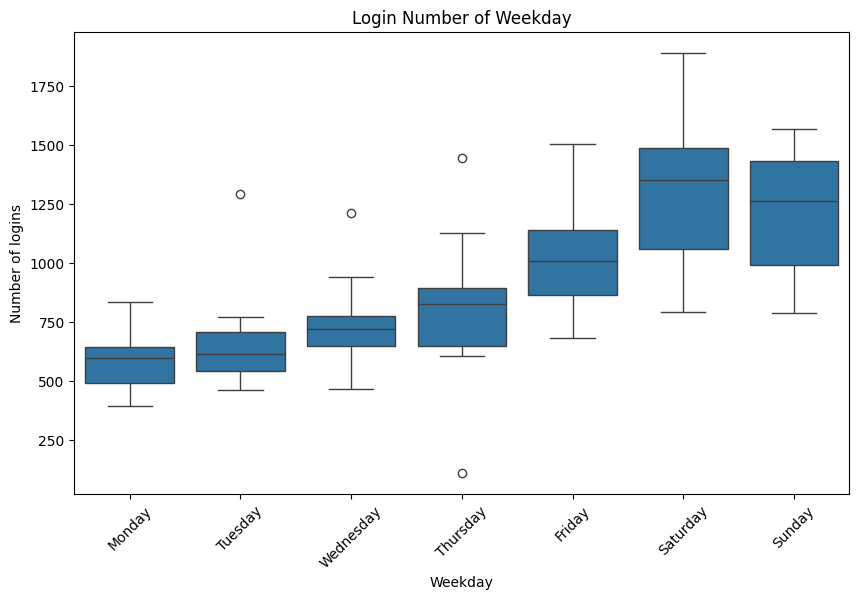

In [181]:
ax = sns.boxplot(x='weekday', y='count', data=login_data_day)
plt.title("Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

We can get reletively same result form the boxplot above. But there were some outliers on Tuesday, Wednesday and Thurday. Login numbers on weekends varied most.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

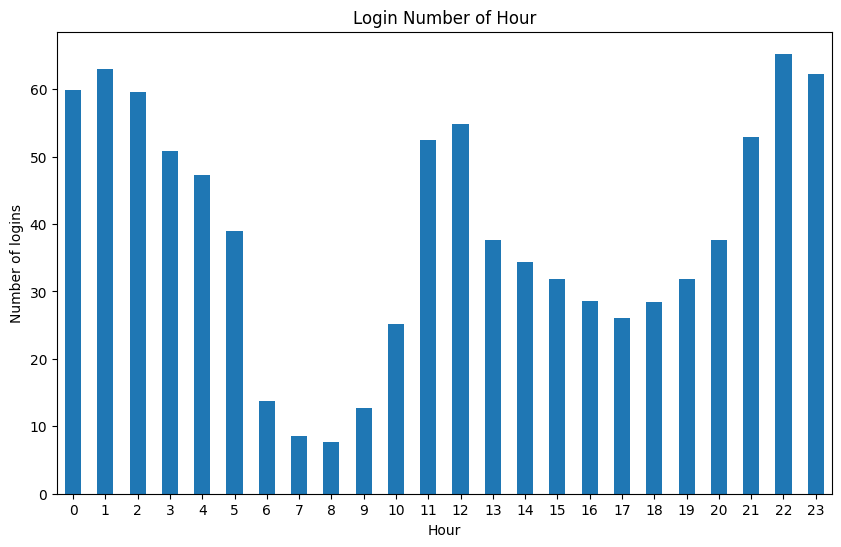

In [182]:
# Login activities in daily cycle
# hour
(login_counts_data.groupby('hour')['count'].sum()/100).plot(kind='bar')
plt.title("Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Most logins are at night, from 10 PM to 2 AM. Least logins are in the moring. There are more logins at noon than in the afternoon.

In [183]:
# Aggregate login counts based on 1-hour time intervals
login_data_hour = login_data.resample('H').sum()
login_data_hour.head()

,count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


In [184]:
login_data_hour['time'] = pd.to_datetime(login_data_hour.index)
login_data_hour['hour'] = login_data_hour.time.dt.hour
login_data_hour.head()

,count,time,hour
login_time,,,
1970-01-01 20:00:00,24,1970-01-01 20:00:00,20
1970-01-01 21:00:00,9,1970-01-01 21:00:00,21
1970-01-01 22:00:00,21,1970-01-01 22:00:00,22
1970-01-01 23:00:00,58,1970-01-01 23:00:00,23
1970-01-02 00:00:00,53,1970-01-02 00:00:00,0


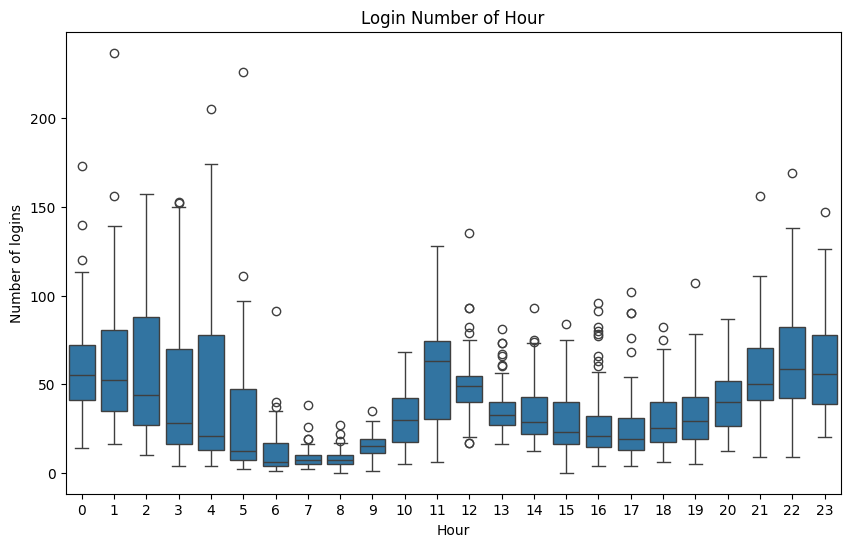

In [185]:
sns.mpl.rc('figure', figsize=(10, 6))
ax = sns.boxplot(x='hour', y='count', data=login_data_hour)
plt.title("Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.show()

From this boxplot, we can see same trend as in above bar chart. But we find many outliers in this plot. And vary range of 2~4 AM are bigger than other time.

### Result:
1) Login counts kept increasing from January to March and reached the peak in March.

2) In a week's step, login counts rised and droped a little. Logins in week 12 are the most. It is the last week of March. Logins in week 14 are the second most. It is the second week of April.

3) Login number kept increasing from Monday to Saturday. There are more logins in weekends than in weekdays. Logins on Saturday are the most, and logins on Sunday are the second most, while logins on Friday are the third most. Login numbers on weekends varied most.

4) Most logins are at night, from 10 PM to 2 AM. Least logins are in the moring. There are more logins at noon than in the afternoon. Login counts varied most from 2 AM to 4 AM.

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

  1) Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

 2) Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

 3) Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).

## Data Wrangling

In [186]:
df = pd.read_json('/content/ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [187]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [189]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [190]:
df.isnull().sum()

,0
city,0
trips_in_first_30_days,0
signup_date,0
avg_rating_of_driver,8122
avg_surge,0
last_trip_date,0
phone,396
surge_pct,0
ultimate_black_user,0
weekday_pct,0


In [191]:
# Fill in missing values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df.dropna(axis=0, inplace=True)

In [192]:
df = df.reset_index(drop=True)

In [193]:
# Convert dates to datetime format
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

## EDA

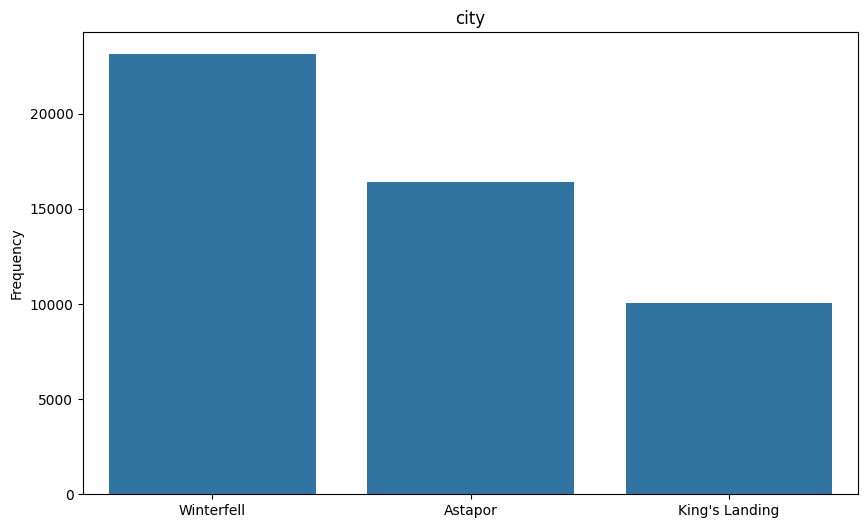

city
Winterfell        23125
Astapor           16413
King's Landing    10066
Name: count, dtype: int64


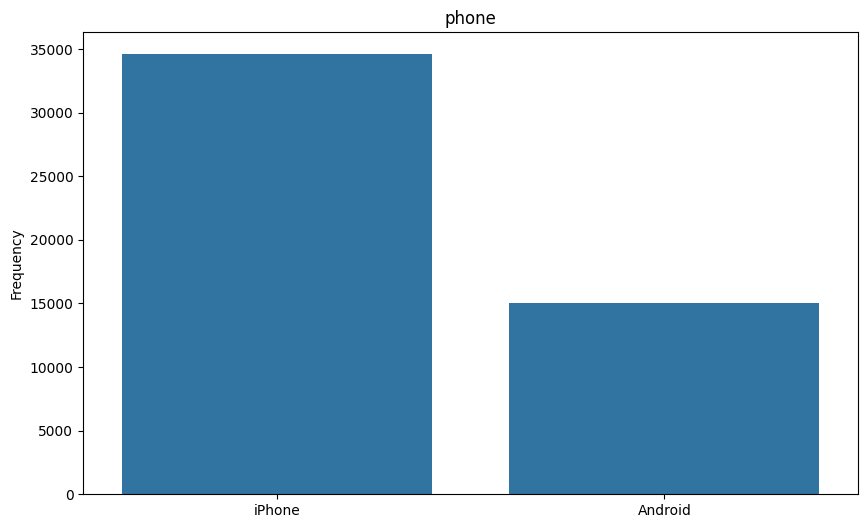

phone
iPhone     34582
Android    15022
Name: count, dtype: int64


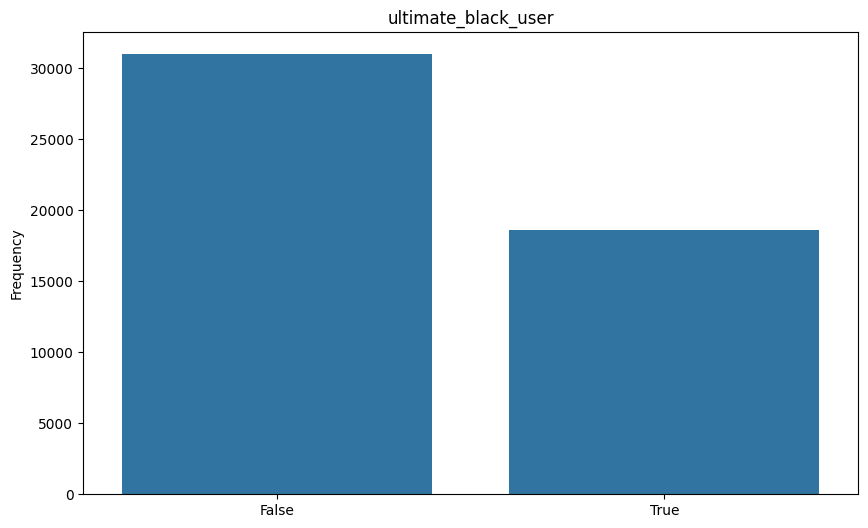

ultimate_black_user
False    30992
True     18612
Name: count, dtype: int64


In [195]:
# Create box plots of all categorical, non-date data
categorical_features = ['city', 'phone', 'ultimate_black_user']

for feature in categorical_features:
    sns.barplot(x = list(df[feature].value_counts().index), y = df[feature].value_counts())
    plt.title(feature)
    plt.ylabel('Frequency')
    plt.show()
    print(df[feature].value_counts())

<ipython-input-196-9ad930d0746b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


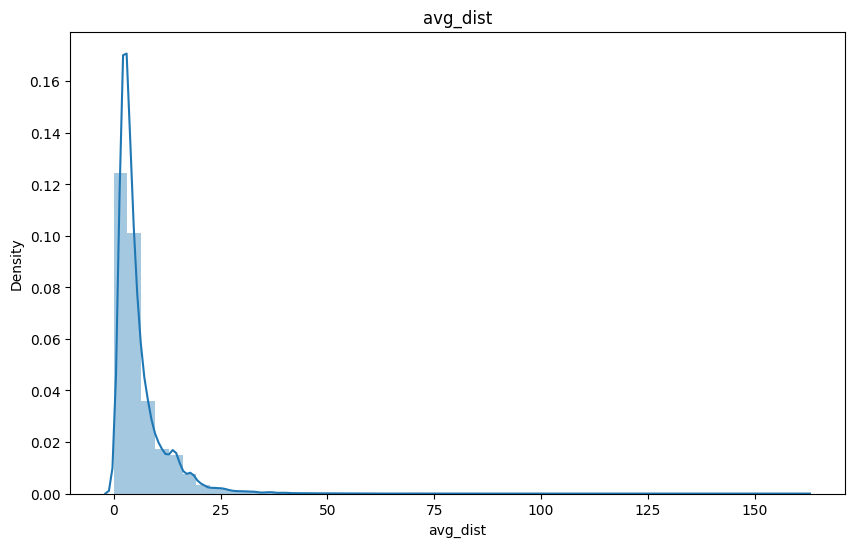

<ipython-input-196-9ad930d0746b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


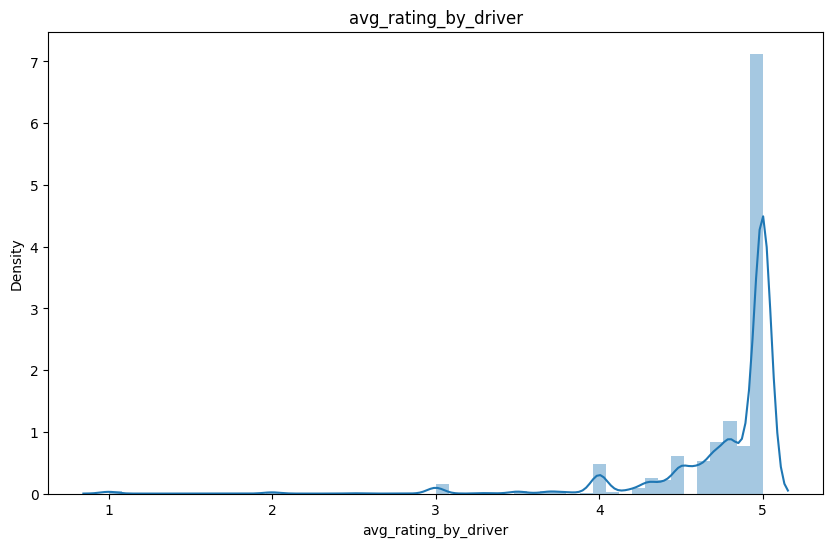

<ipython-input-196-9ad930d0746b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


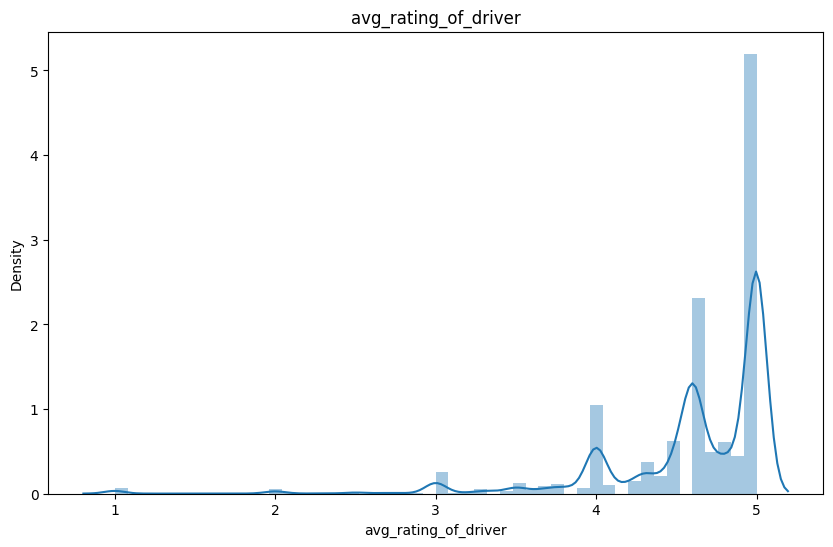

<ipython-input-196-9ad930d0746b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


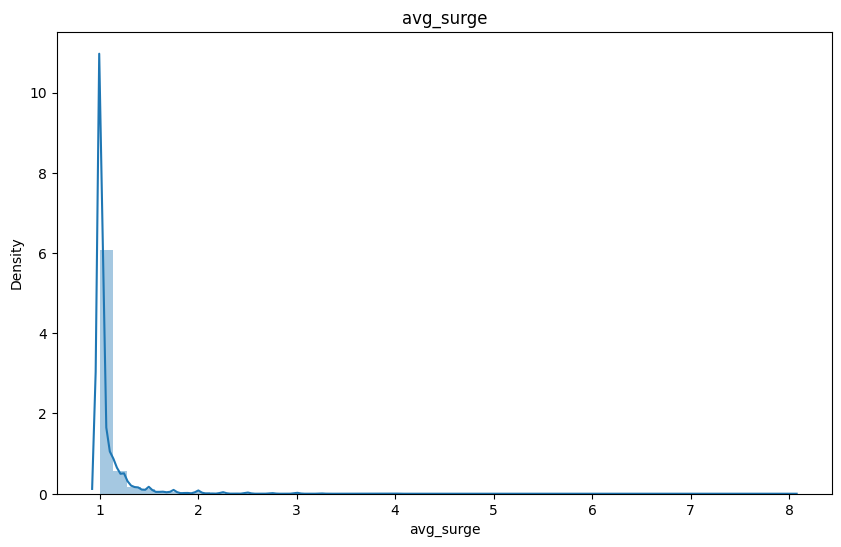

<ipython-input-196-9ad930d0746b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


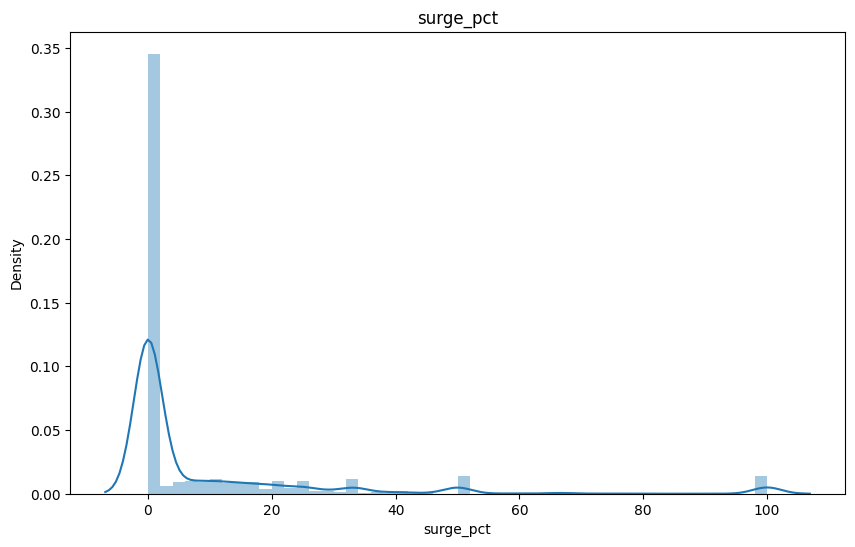

<ipython-input-196-9ad930d0746b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


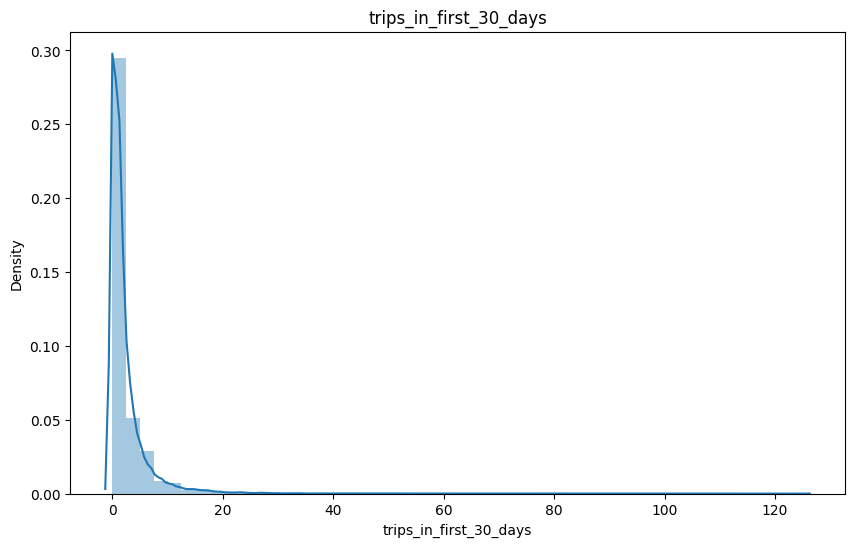

<ipython-input-196-9ad930d0746b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


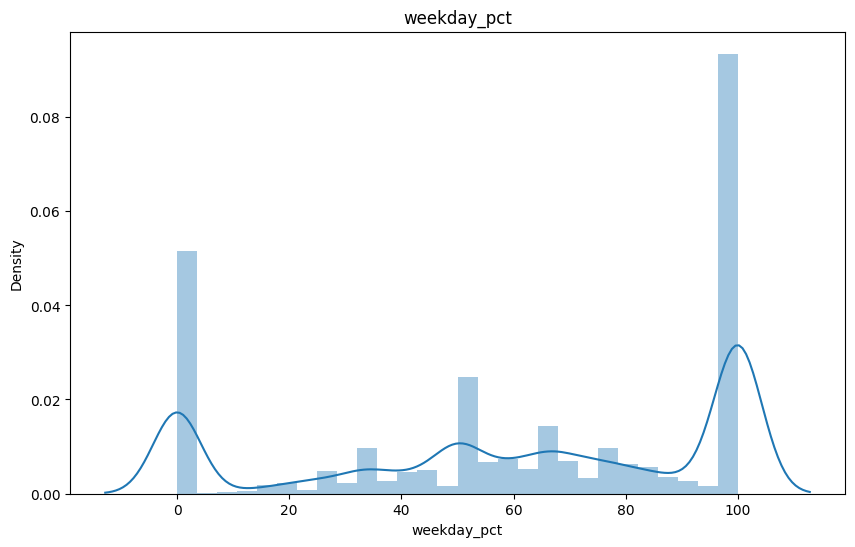

In [196]:
# Show distributions of numerical features
numerical_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver',
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

for feature in numerical_features:
    sns.distplot(df[feature])
    plt.title(feature)
    plt.show();

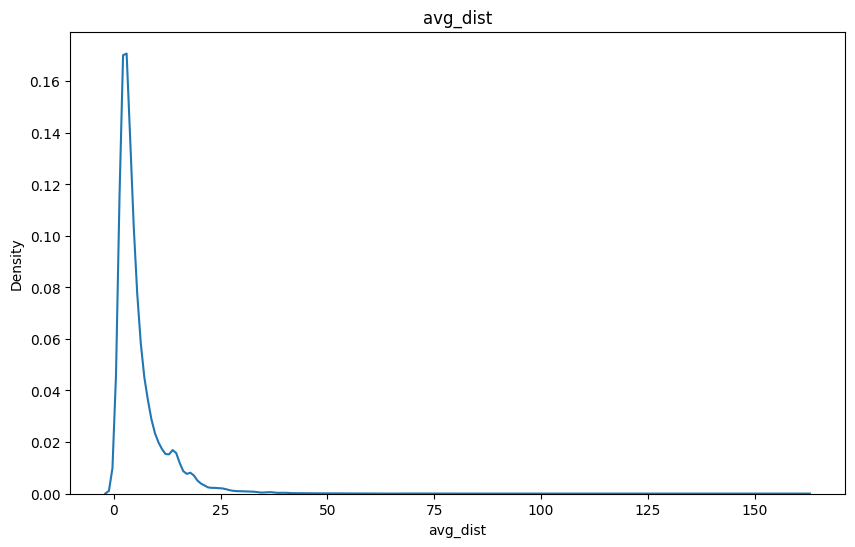

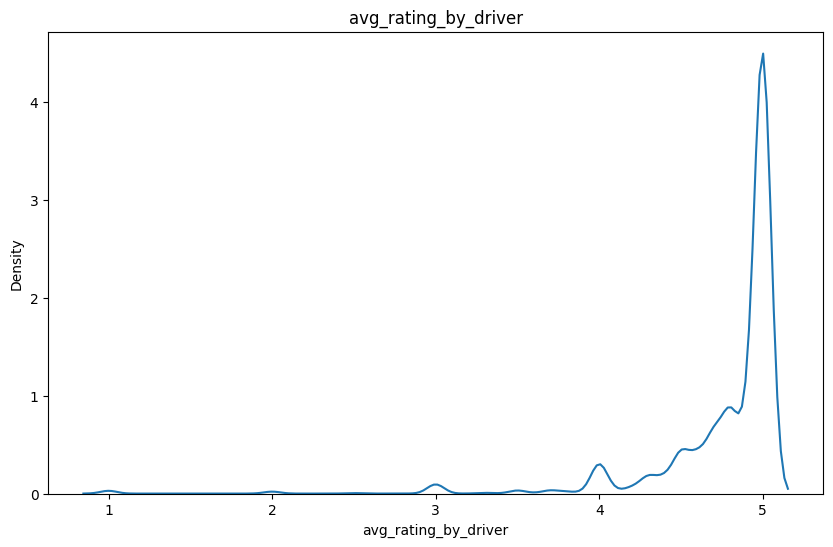

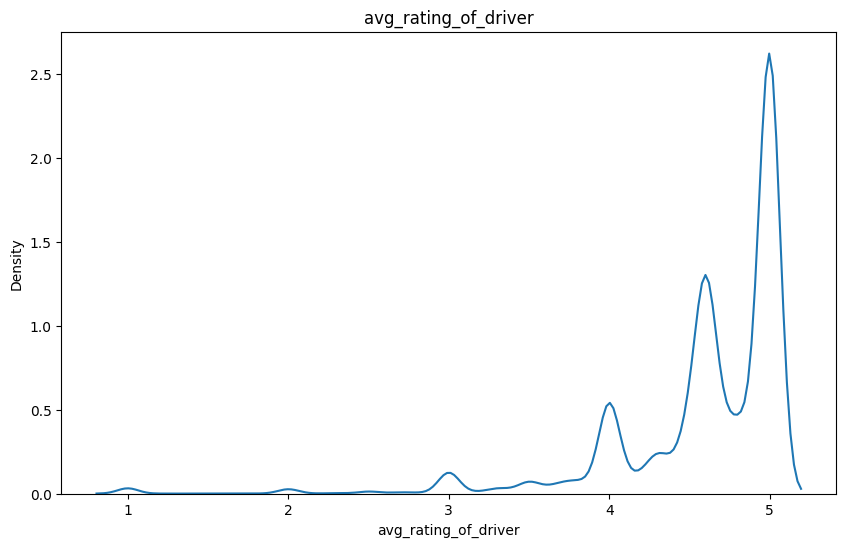

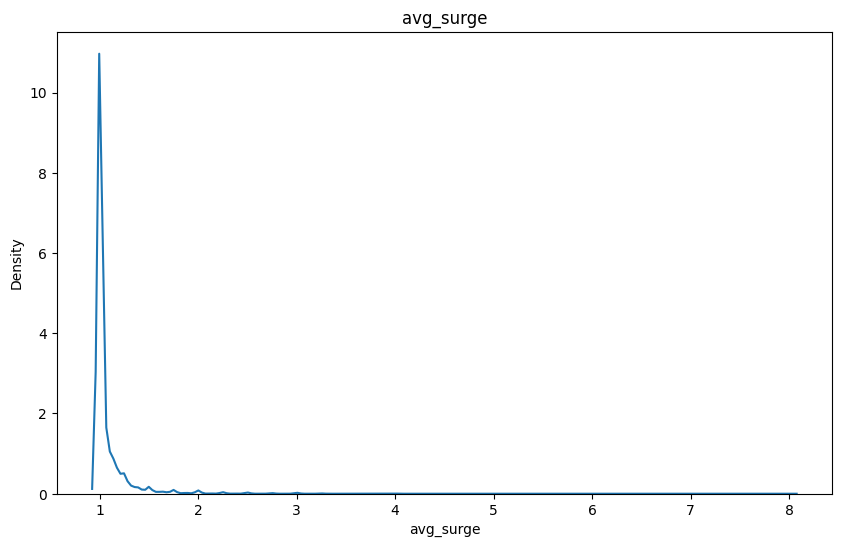

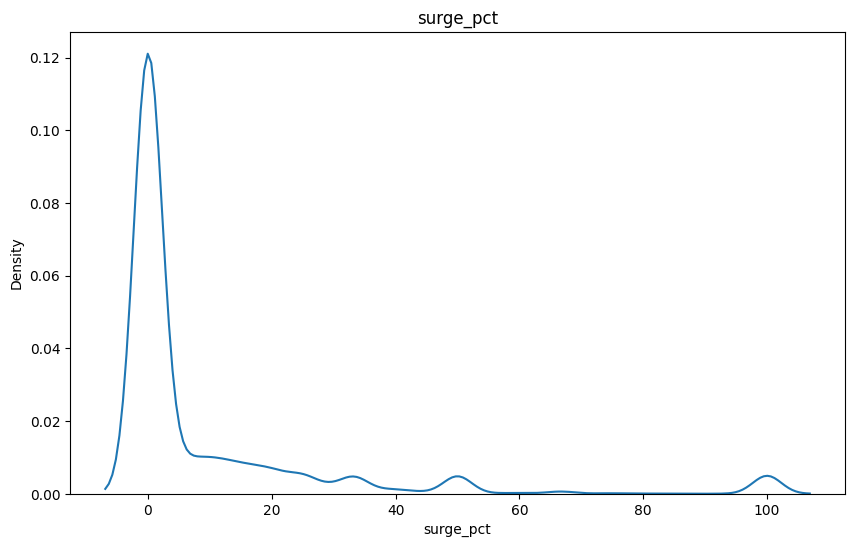

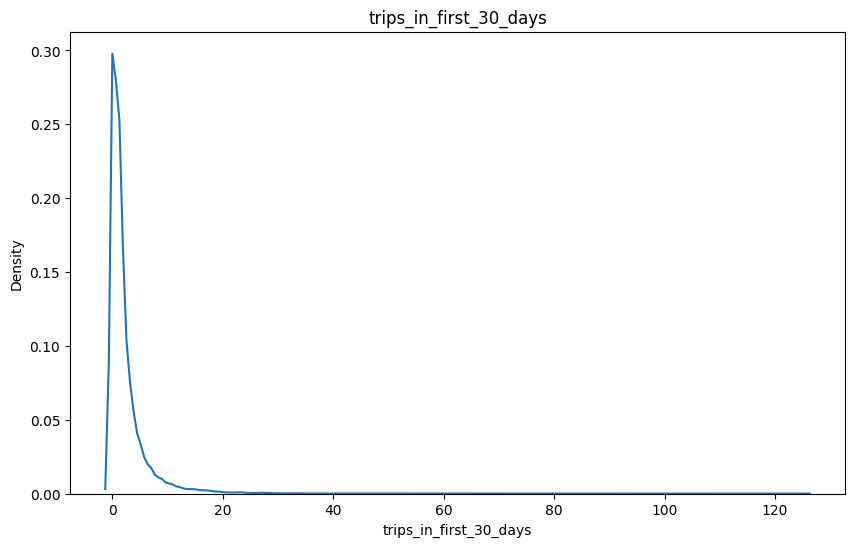

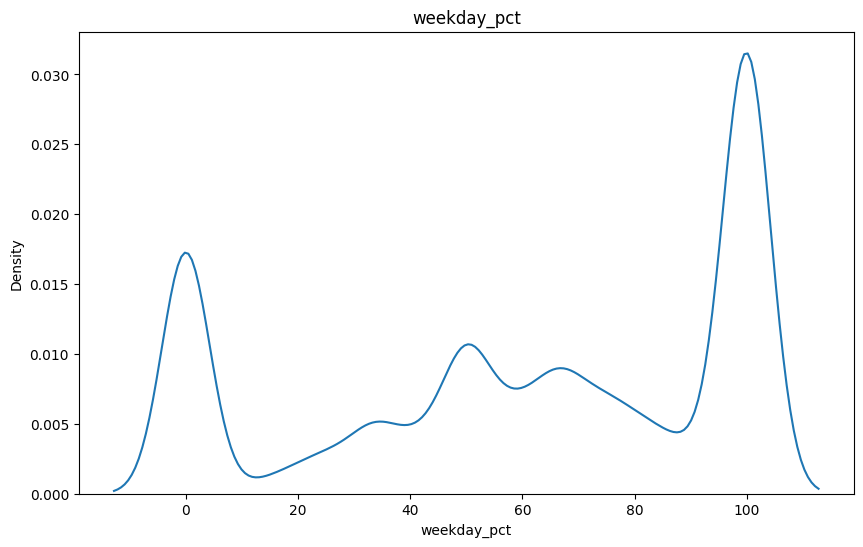

In [197]:
for feature in numerical_features:
    sns.kdeplot(df[feature])
    plt.title(feature)
    plt.show();

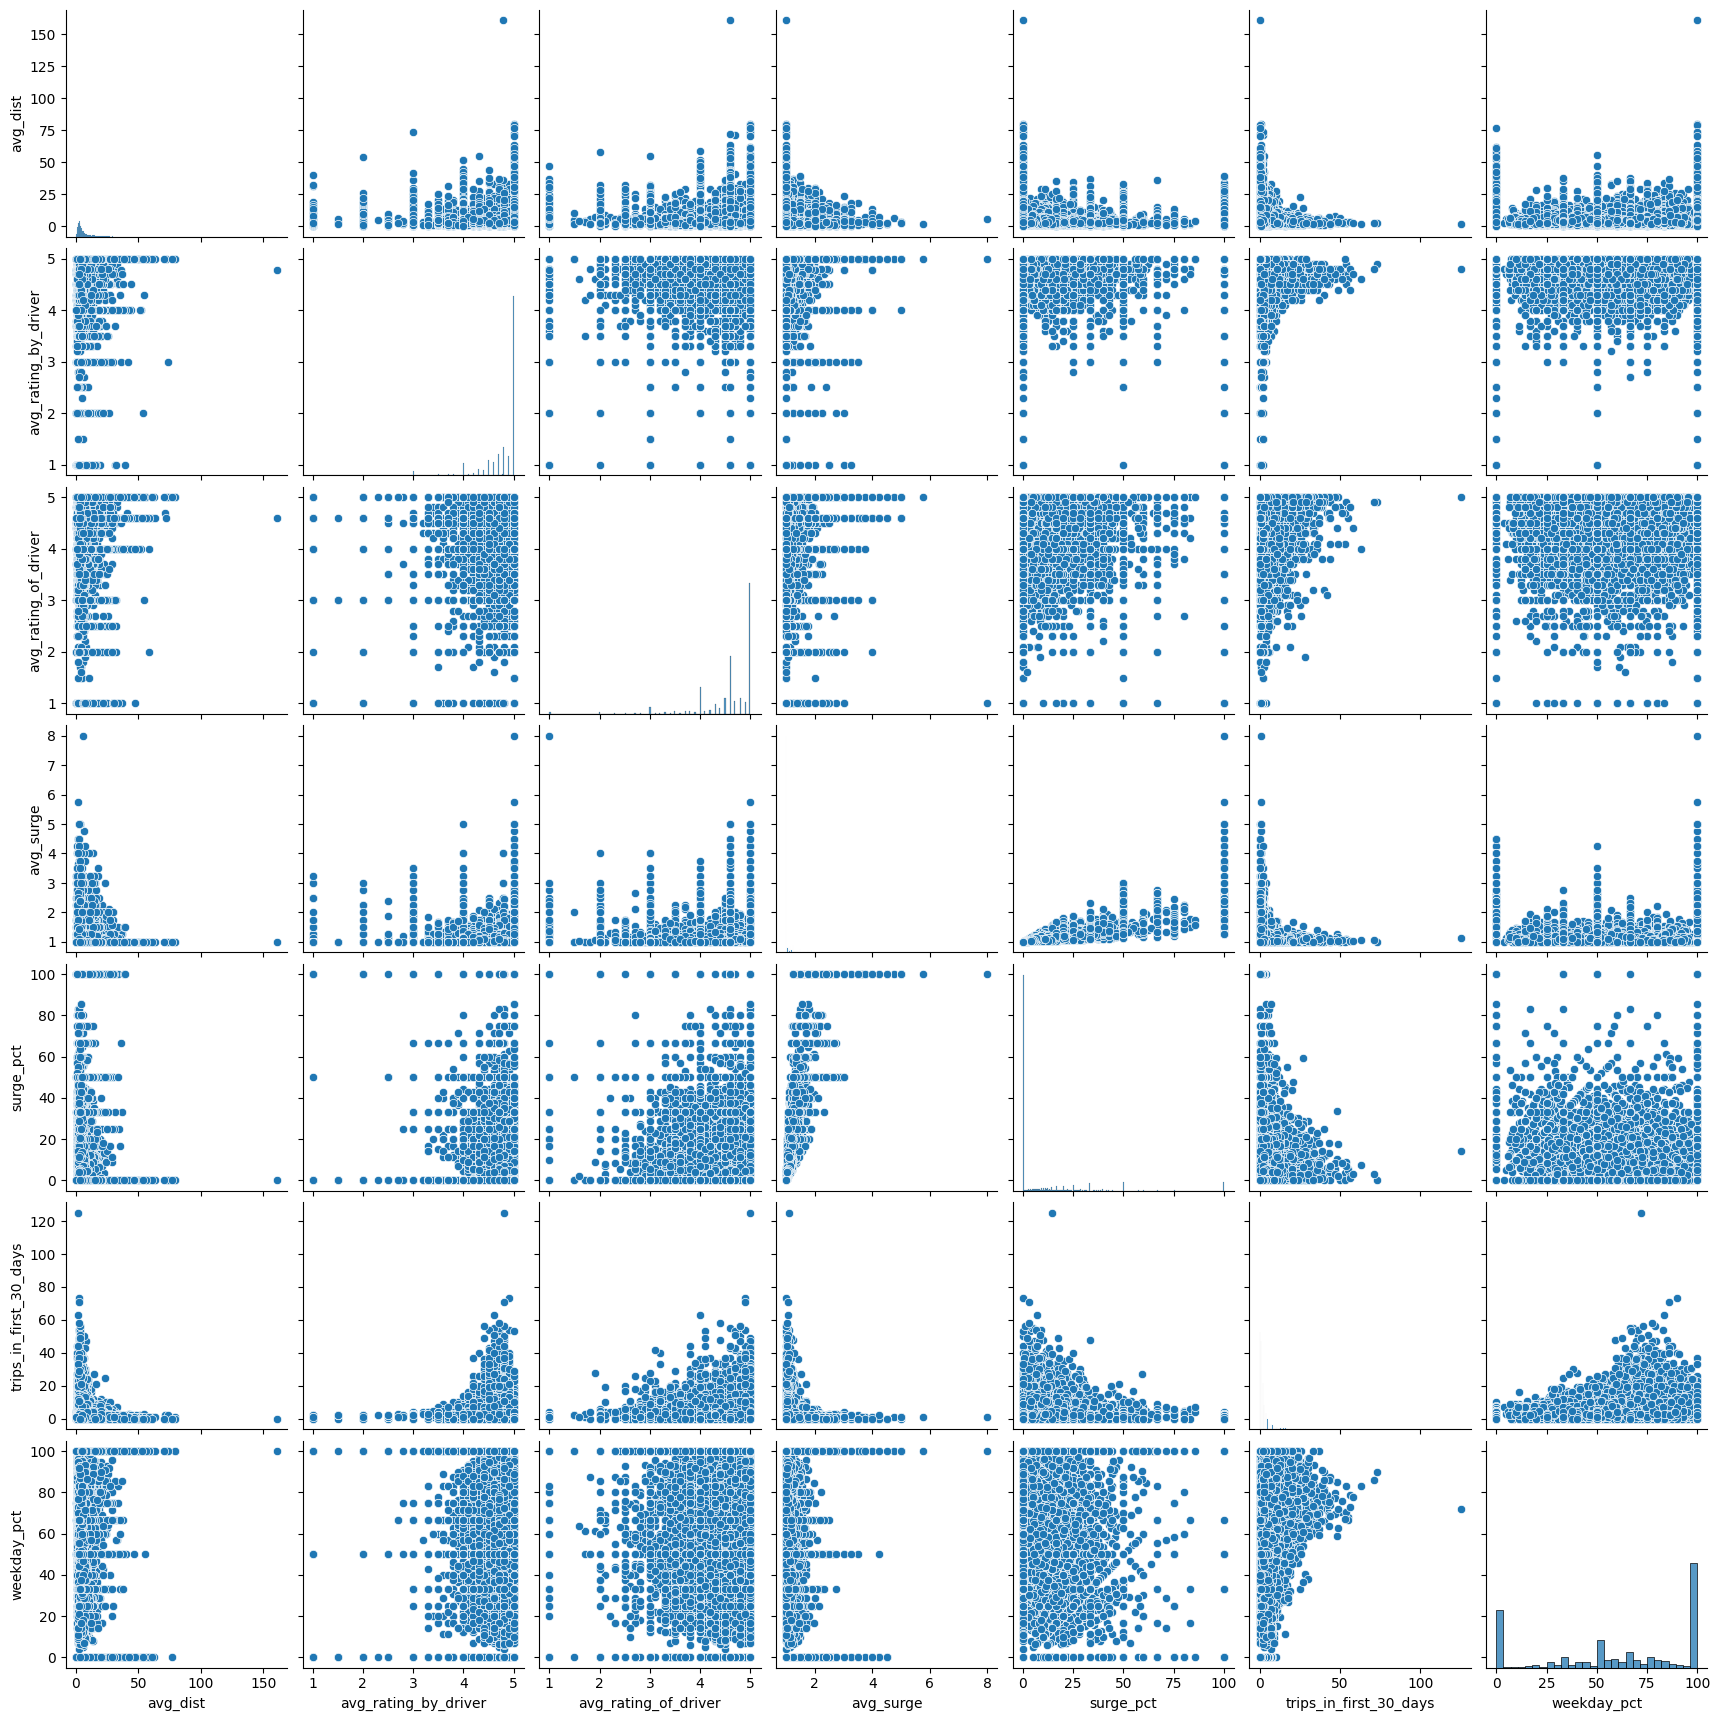

In [198]:
sns.pairplot(df[numerical_features])

In [199]:
df.sort_values(by='trips_in_first_30_days', ascending=False).head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
18370,King's Landing,125,2014-01-02,5.0,1.12,2014-06-30,iPhone,14.4,True,72.0,2.02,4.8
99,Astapor,73,2014-01-27,4.9,1.00,2014-03-05,Android,0.0,True,89.7,2.86,4.9
3001,Winterfell,71,2014-01-06,4.9,1.06,2014-06-28,iPhone,2.9,True,85.9,2.32,4.8
28854,Astapor,63,2014-01-10,4.0,1.07,2014-06-29,iPhone,7.3,True,83.3,1.45,4.6
48422,Astapor,58,2014-01-24,4.4,1.04,2014-06-05,iPhone,3.1,True,77.6,2.30,4.7


In [200]:
df['last_trip_date'].sort_values().tail()

,last_trip_date
45166,2014-07-01
12053,2014-07-01
18667,2014-07-01
11999,2014-07-01
31351,2014-07-01


So the latest 'trips_in_first_30_days' is 2014-07-01. As we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days, We consider a user retained if his 'last_trip_date' is after 2014-06-01.

In [201]:
frac = len(df[df['last_trip_date'] > '2014-06-01'])/len(df)
print('{:.2f}% of the observed users were retained.'.format(frac*100))

36.65% of the observed users were retained.


## Data Modeling

### Prepare dataset

In [202]:
df['retained'] = (df['last_trip_date'] > '2014-06-01')*1

In [203]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
 12  retained                49604 non-null  int64 

In [205]:
# Drop datetime features
df.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

In [206]:
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0


In [207]:
# Creating dummy variables for categorical features
ndf = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)

In [208]:
ndf.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,True,False,True,True
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,False,False,False,False
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,False,False,True,False
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,True,False,True,True
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,False,True,False,False


### Split data into training and test sets

In [209]:
X = ndf.drop('retained', axis=1)
y = ndf['retained']

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39683, 11)
(9921, 11)
(39683,)
(9921,)


### ML Model

We will use Random Forest Classifier here. Random forests algorithm is among the most popular machine learning methods thanks to its relatively good accuracy, robustness and ease of use. It is also often used for feature selection.

Below are the advantages of random forest algorithm compared with other classification algorithms.

 * The overfitting problem will never come when we use the random forest algorithm in any classification problem.

 * The random forest algorithm can be used for feature engineering.

 * Which means identifying the most important features out of the available features from the training dataset.

In [211]:
clf = RandomForestClassifier()
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.77069422 0.75721305 0.76628449 0.76688508 0.76348286]
Average 5-Fold CV Score: 0.7649119407318521


So, using Random Forest Claasifier with default parameters, we can get a model with 76.5% accuracy.

### Hyperparameter Tuning

In [216]:
# Define function to get metrics of the model
def get_metrics(true_labels, predicted_labels):
    print ('Accuracy: ', accuracy_score(true_labels,predicted_labels))
    print (classification_report(true_labels, predicted_labels))

In [217]:
# Create the hyperparameter grid
n_options = [50, 100]
feature_options = [8, 10]
oob_options = [True, False]
param_grid = {'n_estimators': n_options, 'max_features': feature_options, 'oob_score': oob_options}

In [218]:
# Instantiate the GridSearchCV object
clf_cv = GridSearchCV(clf, param_grid, cv=5)
# build model
clf_cv.fit(X_train, y_train)
# predict using model
y_predict = clf_cv.predict(X_test)

In [219]:
# Print the optimal parameters and best score
print("Tuned Parameter: {}".format(clf_cv.best_params_))
print("Tuned Score: {}".format(clf_cv.best_score_))
print()
# evaluate model prediction performance
print ('Test set performance:')
get_metrics(true_labels=y_test, predicted_labels=y_predict)

Tuned Parameter: {'max_features': 10, 'n_estimators': 100, 'oob_score': False}
Tuned Score: 0.7665751106495915

Test set performance:
Accuracy:  0.7608104021771999
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      6290
           1       0.68      0.65      0.67      3631

    accuracy                           0.76      9921
   macro avg       0.74      0.74      0.74      9921
weighted avg       0.76      0.76      0.76      9921



After hyperparameter tuning, we get the best parameters of n_estimators=100, max_features=10, oob_score=False with accuracy of 76.65%.

### Final Model

In [226]:
rfc = RandomForestClassifier(n_estimators=100, max_features=8, oob_score=True)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [227]:
# Generate classification report
print(classification_report(y_test, y_pred))
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      6290
           1       0.68      0.65      0.67      3631

    accuracy                           0.76      9921
   macro avg       0.74      0.74      0.74      9921
weighted avg       0.76      0.76      0.76      9921

Test set accuracy: 76.15%


In [229]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5179 1111]
 [1255 2376]]


Text(0.5, 1.0, 'ROC Curve')

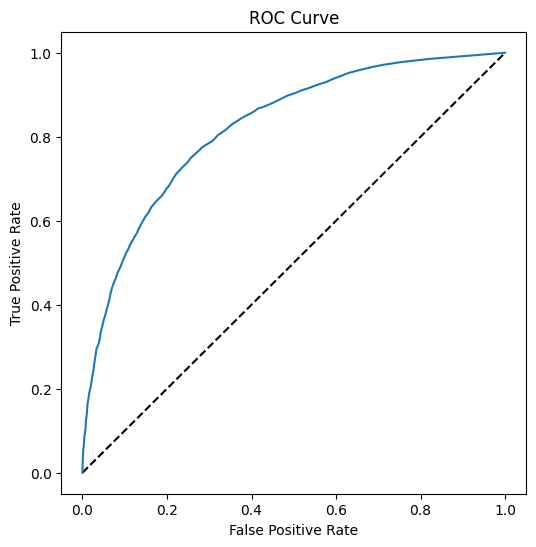

In [222]:
# Compute predicted probabilities
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [223]:
# Compute and print AUC score
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8224


### Feature Selection

In [230]:
fi = pd.DataFrame(list(zip(X.columns, rfc.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False).head(10)

,features,Importance
5,avg_dist,0.296592
6,avg_rating_by_driver,0.148903
4,weekday_pct,0.114156
3,surge_pct,0.088677
1,avg_rating_of_driver,0.080770
0,trips_in_first_30_days,0.069200
7,city_King's Landing,0.067303
2,avg_surge,0.048823
9,phone_iPhone,0.038115
10,ultimate_black_user_True,0.028986


From the importance of features, we find that the most important 3 features are:

 * avg_dist: the average distance in miles per trip taken in the first 30 days after signup
 * avg_rating_by_driver: the rider’s average rating over all of their trips
 * weekday_pct: the percent of the user’s trips occurring during a weekday

### Suggestions to Ultimate

To improve long-term rider retention, Ultimate need improve in the following aspects:

 * Attract riders to take longer trips during the first 30 days after signup.
 * Provide better service to get higher ratings from the riders.
 * Persuade riders to take trips during weekdays.